# EDA of Bundesliga Football Data

In this project, I've tried to make an exploratory data analysis and visualized some key points regarding Bundesliga metrics from the dataset in this link: https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg

Note: This dataset only includes domestic league stats, therefore Champions League, Europa League or DFB Pokal performances weren't put into consideration in this project.

In [1]:
#Necessary library importations and creating the dataframe
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

df = pd.read_csv(r"I:\archive\understat_per_game.csv")


In [2]:
#Getting a general view of the data
print(df.head())
df.date = pd.to_datetime(df.date)
df.describe()
df.info()

       league  year h_a       xG       xGA     npxG     npxGA  deep  \
0  Bundesliga  2014   h  2.57012  1.198420  2.57012  1.198420     5   
1  Bundesliga  2014   a  1.50328  1.307950  1.50328  1.307950    10   
2  Bundesliga  2014   h  1.22987  0.310166  1.22987  0.310166    13   
3  Bundesliga  2014   a  1.03519  0.203118  1.03519  0.203118     6   
4  Bundesliga  2014   h  3.48286  0.402844  3.48286  0.402844    23   

   deep_allowed  scored  missed    xpts result                 date  wins  \
0             4       2       1  2.3486      w  2014-08-22 19:30:00     1   
1             1       1       1  1.5143      d  2014-08-30 17:30:00     0   
2             3       2       0  2.1588      w  2014-09-13 14:30:00     1   
3             2       0       0  2.1367      d  2014-09-20 14:30:00     0   
4             2       4       0  2.9287      w  2014-09-23 19:00:00     1   

   draws  loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
0      0      0    3  1.371700   

In [3]:
#Definitely not necessary, although I just couldn't bear to see it wrote like "Fortuna Duesseldorf" so 
#fixed that
df["team"] = df.team.replace("Fortuna Duesseldorf" ,"Fortuna Düsseldorf")

#Simple function to extract a specific year from the year column
def season_date(frame, year):
    new = frame[frame["year"] == year]
    return new
df_2019 = season_date(df, 2019)
bundesliga = df_2019[df_2019["league"] == "Bundesliga"]
df_2019.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
3060,Bundesliga,2019,h,2.47707,1.18459,1.71929,1.184590,17,2,2,2,2.3576,d,2019-08-16 19:30:00,0,1,0,1,0.534700,10.500000,168,16,16.217391,373,23,Bayern Munich,0.47707,-0.81541,1.3576
3061,Bundesliga,2019,a,1.59729,1.08016,0.83951,1.080160,9,6,3,0,1.8269,w,2019-08-24 17:30:00,1,0,0,3,-0.240650,9.684211,184,19,18.280000,457,25,Bayern Munich,-1.40271,1.08016,-1.1731
3062,Bundesliga,2019,h,3.34597,0.72047,3.34597,0.720470,8,2,6,1,2.8148,w,2019-08-31 14:30:00,1,0,0,3,2.625500,5.354839,166,31,20.350000,407,20,Bayern Munich,-2.65403,-0.27953,-0.1852
3063,Bundesliga,2019,a,1.67040,1.65427,1.67040,0.896496,10,7,1,1,1.3717,d,2019-09-14 16:30:00,0,1,0,1,0.773904,9.142857,192,21,17.178571,481,28,Bayern Munich,0.67040,0.65427,0.3717
3064,Bundesliga,2019,h,2.92351,1.03267,2.16573,1.032670,12,7,4,0,2.5456,w,2019-09-21 13:30:00,1,0,0,3,1.133060,7.920000,198,25,14.500000,319,22,Bayern Munich,-1.07649,1.03267,-0.4544


#  Definition of some metrics according to the original author of the dataset

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded(from understat.com)

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

xpts - expected points

xpts_diff - difference between actual and expected points

Text(0, 0.5, 'Points total')

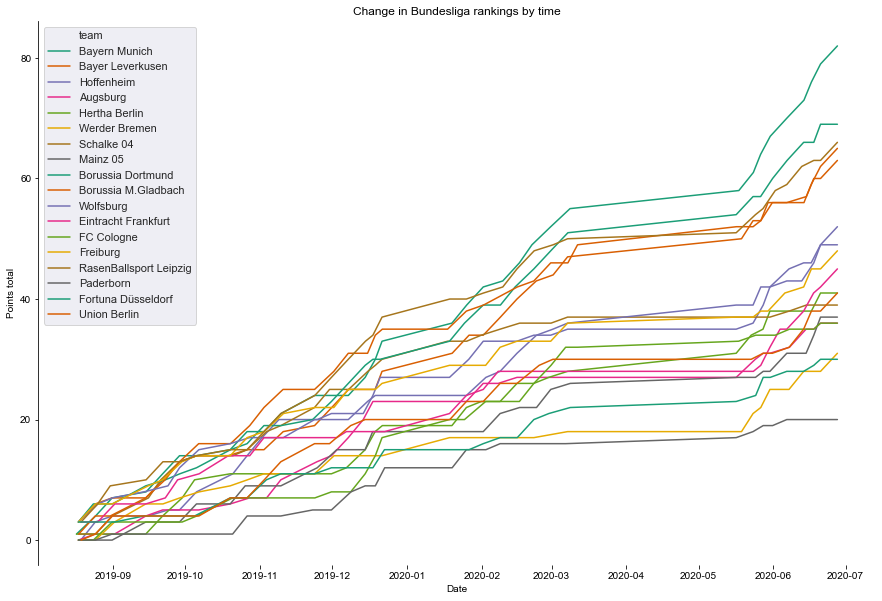

In [4]:
#Plot the cumulative change in total points and therefore the rankings in time

ax = plt.subplots(figsize=(15, 10))
sns.set_context("notebook")
sns.set_style("dark")
sns.lineplot(bundesliga.date, bundesliga.groupby("team").pts.cumsum(), hue="team", data=bundesliga, palette = "Dark2")
sns.despine(top=True, bottom=True, right=True)
plt.title("Change in Bundesliga rankings by time")
plt.xlabel("Date")
plt.ylabel("Points total")

In [5]:
#Grouped by the team column, then took the means of xG and scored columns 
#in order to compare average xG and goal amounts by team
bundesliga_expected_actual = df_2019[df_2019["league"] == "Bundesliga"].groupby("team")[["xG", "scored"]].mean()
#Reset the index for easier column operations
bundesliga_expected_actual = bundesliga_expected_actual.reset_index()
#Sort values by goal expectation
bundesliga_expected_actual = bundesliga_expected_actual.sort_values("xG", ascending = False)
display(bundesliga_expected_actual)

,team,xG,scored
2,Bayern Munich,2.730928,2.941176
13,RasenBallsport Leipzig,2.239017,2.382353
4,Borussia M.Gladbach,2.164170,1.941176
3,Borussia Dortmund,1.890049,2.470588
1,Bayer Leverkusen,1.820127,1.794118
5,Eintracht Frankfurt,1.715693,1.735294
10,Hoffenheim,1.666492,1.558824
17,Wolfsburg,1.600985,1.411765
6,FC Cologne,1.449339,1.500000
11,Mainz 05,1.358521,1.294118


In [6]:
#Again group by the team columns, although this time compare with
#average successful deep passes per game
bundesliga_deep = bundesliga.groupby("team").deep.mean()
bundesliga_deep = bundesliga_deep.reset_index()
bundesliga_deep = bundesliga_deep.sort_values("deep", ascending = False)
display(bundesliga_deep)

,team,deep
2,Bayern Munich,11.970588
13,RasenBallsport Leipzig,8.911765
3,Borussia Dortmund,8.735294
4,Borussia M.Gladbach,6.823529
1,Bayer Leverkusen,6.764706
10,Hoffenheim,5.911765
14,Schalke 04,5.705882
17,Wolfsburg,5.647059
5,Eintracht Frankfurt,5.529412
16,Werder Bremen,5.470588


In [7]:
#Same as the above two cells
bundesliga_points = df_2019[df_2019["league"] == "Bundesliga"].groupby("team")[["pts", "xpts"]].sum()
bundesliga_points = bundesliga_points.reset_index()
bundesliga_points = bundesliga_points.sort_values("pts", ascending = False)
bundesliga_xpoints = bundesliga_points.sort_values("xpts", ascending = False)
display(bundesliga_points)

,team,pts,xpts
2,Bayern Munich,82,77.3257
3,Borussia Dortmund,69,62.4827
13,RasenBallsport Leipzig,66,68.7067
4,Borussia M.Gladbach,65,62.6315
1,Bayer Leverkusen,63,54.6178
10,Hoffenheim,52,45.8749
17,Wolfsburg,49,55.6943
8,Freiburg,48,39.1515
5,Eintracht Frankfurt,45,52.7225
15,Union Berlin,41,39.3247


In [8]:
#Create a column named press_eff showing the ratio of passes that teams allowed 
#their opponents to make inside their box before recieving the ball

bundesliga["press_eff"] = bundesliga["deep_allowed"]/bundesliga["ppda_coef"]
bundesliga_press = bundesliga.groupby("team").press_eff.mean()
bundesliga_press = bundesliga_press.reset_index()
bundesliga_press = bundesliga_press.sort_values("press_eff", ascending = False)
display(bundesliga_press)

,team,press_eff
12,Paderborn,0.753657
1,Bayer Leverkusen,0.610434
6,FC Cologne,0.604291
11,Mainz 05,0.599721
5,Eintracht Frankfurt,0.588250
10,Hoffenheim,0.574896
14,Schalke 04,0.567721
9,Hertha Berlin,0.538604
16,Werder Bremen,0.533673
17,Wolfsburg,0.525715


In [9]:
#Create a column named peneteration showing the ratio of passes that teams made 
#inside opposition box before their opponents recovered the ball

bundesliga["peneteration"] = bundesliga["deep"]/bundesliga["oppda_coef"]
bundesliga_penet = bundesliga.groupby("team").peneteration.mean()
bundesliga_penet = bundesliga_penet.reset_index()
bundesliga_penet = bundesliga_penet.sort_values(by = "peneteration", ascending = False)
display(bundesliga_penet)

,team,peneteration
13,RasenBallsport Leipzig,0.679837
11,Mainz 05,0.676331
17,Wolfsburg,0.644597
14,Schalke 04,0.620095
2,Bayern Munich,0.602462
4,Borussia M.Gladbach,0.576613
6,FC Cologne,0.531216
3,Borussia Dortmund,0.530185
16,Werder Bremen,0.522248
0,Augsburg,0.516068


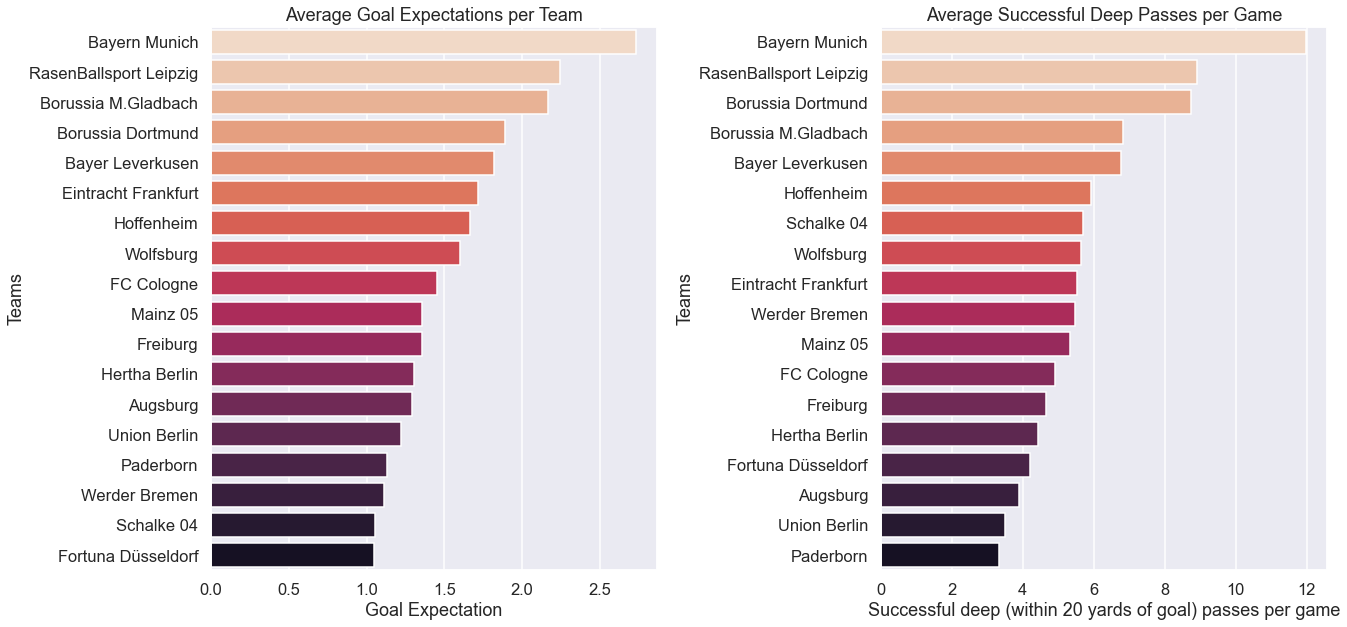

In [10]:
#Plot bar graphs of average xpts and deep for each team side-by-side

sns.set_context("talk")
sns.set_style("darkgrid")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.5)
sns.barplot(x="xG", y="team", palette="rocket_r", data=bundesliga_expected_actual, ax=ax1)
ax1.set(title=("Average Goal Expectations per Team"), xlabel=("Goal Expectation"), ylabel=("Teams"))

sns.barplot(x="deep", y="team", palette="rocket_r", data=bundesliga_deep, ax=ax2)
plt.title("Average Successful Deep Passes per Game")
plt.xlabel("Successful deep (within 20 yards of goal) passes per game")
plt.ylabel("Teams")
plt.show()

# Comparison of deep passing and goal expectations (xG) by team 
We can see on the above left graph that Bayern München had the highest average xG per game, while Fortuna Düsseldorf was last place. 

The metric "deep", which I also used for the right plot was defined by the original author of this dataset as:

"deep - passes completed within an estimated 20 yards of goal (crosses excluded)"

According to the graph, again, Bayern performed best regarding the metric "deep", which pretty much stands for passes around and inside the opponent's penalty box. This might offer a general idea on how teams operate in terms of offensive play, as an example Bayern completed a little bit more than three times the amount of passes Paderborn could (which are last place), and we could extract insights such as: "Bayern have internalized a mentality that mostly employs playing into box with organized passing", 

or: "Paderborn couldn't complete many passes around the box, therefore it indicates that they emphasize a more direct approach when attacking or cross more often" 

using this metric alone.

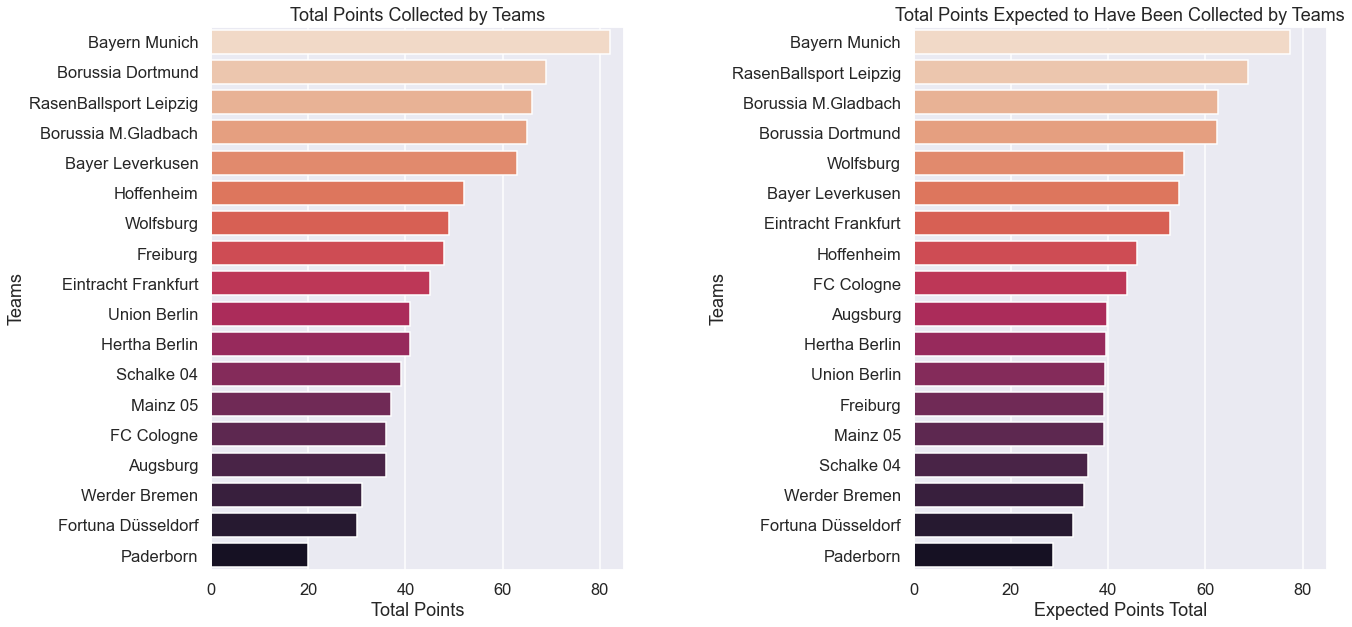

In [11]:
#Plot bar graphs of total pts and xpts for each team side-by-side

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.7)
sns.barplot(x="pts", y="team", palette="rocket_r", data=bundesliga_points, ax=ax1)
ax1.set(title = ("Total Points Collected by Teams"), xlabel=("Total Points"), ylabel=("Teams"), xlim=[0, 85])

sns.barplot(x="xpts", y="team", palette="rocket_r", data=bundesliga_xpoints, ax=ax2)
plt.xlabel("Expected Points Total")
plt.ylabel("Teams")
plt.title("Total Points Expected to Have Been Collected by Teams")
plt.xlim([0, 85])
plt.show()

# Comparison of actual and expected points collected by team in Bundesliga 19/20 season
These couple of plots are more interesting to look at in my opinion mostly since they're metrics in direct correlation with each other. 

As could be seen above, in terms of actual points collected Bayern sit on the top, then come Dortmund and Leipzig. Although on the right-side bar plot, that order changes by Bayern, Leipzig, and Gladbach which have the same expected points as Dortmund. This means that Dortmund overperformed in terms of actual count of total points collected, while Leipzig and Gladbach underperformed. In fact, Bayern also underperformed since they went above 80 points in reality while the expected points metric for them is below that number.

Let's create a ratio of actual points divided by expected points and visualize that for each team, so that we could see much easier which teams underperformed/overperformed and to what extent.

In [12]:
#Create variables that represent overperformance and underperformance
#in terms of collecting points
high_xpts = bundesliga_points[bundesliga_points["xpts"] >= bundesliga_points["pts"]]
high_pts = bundesliga_points[bundesliga_points["pts"] > bundesliga_points["xpts"]]
#Create a new column on the dataframe that was grouped by teams and expected points
#that show the ratio of actual points to expected points
bundesliga_points["pts/xpts"] = bundesliga_points["pts"] / bundesliga_points["xpts"]

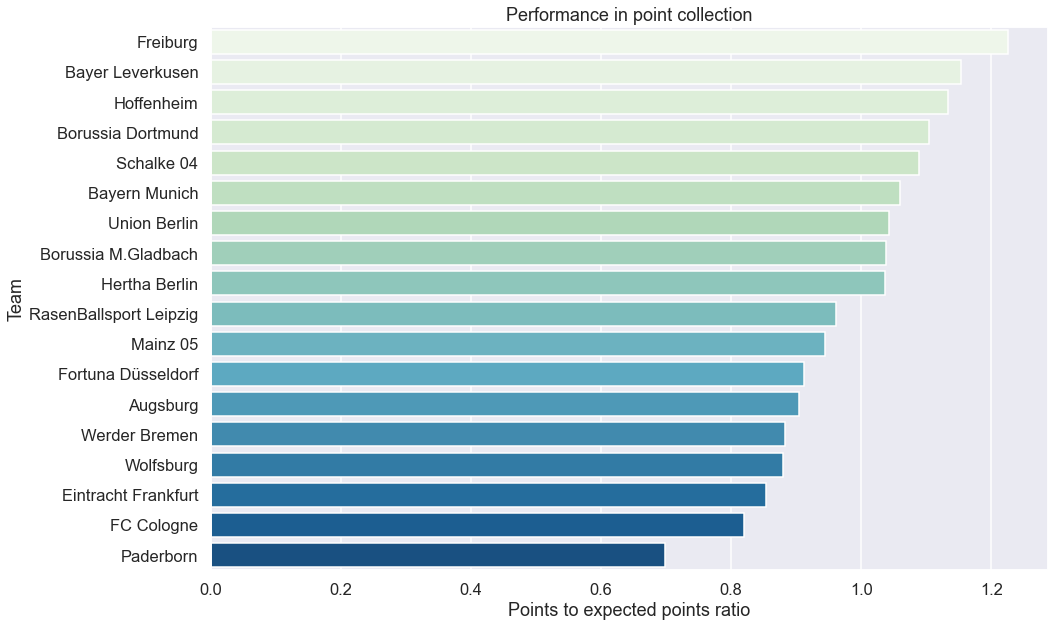

In [13]:
#Plot bar graphs of average pts divided by xpts for each team to understand
#how much each team lived up to expectations in terms of point collection

ax = plt.subplots(figsize=(15, 10))
sns.barplot("pts/xpts", "team", data=bundesliga_points.sort_values(by="pts/xpts", ascending=False), palette="GnBu")
plt.title("Performance in point collection")
plt.xlabel("Points to expected points ratio")
plt.ylabel("Team")
plt.show()

# Evaluation of whether if the teams could live up to expectations in terms of points collected
So, let's try to get a more intuitive view of this bar plot. Numbers on the x-axis represent the ratio that we talked about on the above cell: actual points/expected points. Setting this as our starting point, a ratio on 1.0 would mean that the actual amount of points gathered by a team were 100% consistent with the expectation metric. So, simply put, it could be said that teams that are above the ratio 1.0 *overperformed*, while those under 1.0 *underperformed*.

Let's try the same thing with the actual amount of goals scored and goal expectations!

In [14]:
#Create variables that represent overperformance and underperformance
#in terms of goal scoring
high_xg = bundesliga_expected_actual[bundesliga_expected_actual["xG"] >= bundesliga_expected_actual["scored"]]
high_scoring = bundesliga_expected_actual[bundesliga_expected_actual["scored"] > bundesliga_expected_actual["xG"]]
#Create a new column on the dataframe that was grouped by teams and goal expectations
#that show the ratio of goals to xG
bundesliga_expected_actual["goal/xG"] = bundesliga_expected_actual["scored"] / bundesliga_expected_actual["xG"]

In [15]:
#Check if all's well
bundesliga_expected_actual.head()

,team,xG,scored,goal/xG
2,Bayern Munich,2.730928,2.941176,1.076988
13,RasenBallsport Leipzig,2.239017,2.382353,1.064018
4,Borussia M.Gladbach,2.164170,1.941176,0.896961
3,Borussia Dortmund,1.890049,2.470588,1.307156
1,Bayer Leverkusen,1.820127,1.794118,0.985710


Text(0.5, 1.0, 'Goal/xG Ratios of Bundesliga Clubs in 19/20 Season')

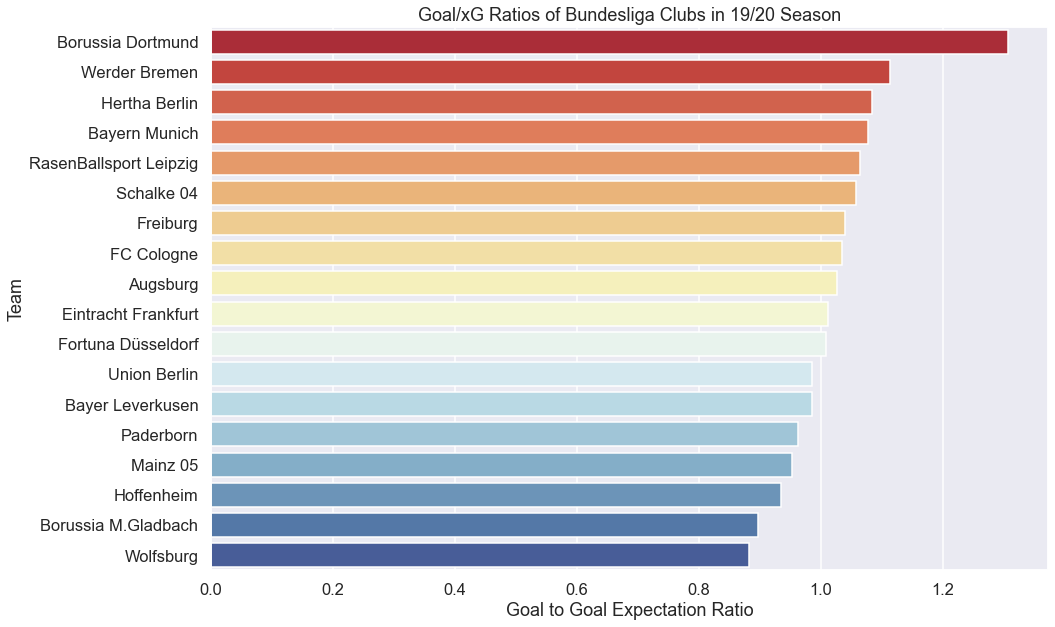

In [16]:
#Plot bar graphs of average goals and expected for each team to see
#how well they performed

ax = plt.subplots(figsize=(15, 10))
sns.barplot("goal/xG", "team", data=bundesliga_expected_actual.sort_values(by="goal/xG", ascending=False), palette="RdYlBu")
plt.ylabel("Team")
plt.xlabel("Goal to Goal Expectation Ratio")
plt.title("Goal/xG Ratios of Bundesliga Clubs in 19/20 Season")

# Evaluation of whether if the teams could live up to expectations in terms of goals scored
This bar plot essentially gives us a visual represantation of the teams' "goal efficiency" rates, where 1.0 means similarly to the bar plot above that the team in question scored as many goals as they were expected to. 

Therefore the teams with a higher ratio, such as Borussia Dortmund or Werder Bremen, could be said to have overperformed in terms of converting chances to goals compared to those that are located at the lower sections of the graph, like Wolfsburg or Borussia Mönchengladbach.

Instead of the league in general, let's focus on a single team now. I chose RB Leipzig, since I've been enjoying their playing style and Julian Nagelsmann's display of his managerial skill set.

Text(0.5, 1.0, "The percentage of passes made around teams' penalty box until recovery")

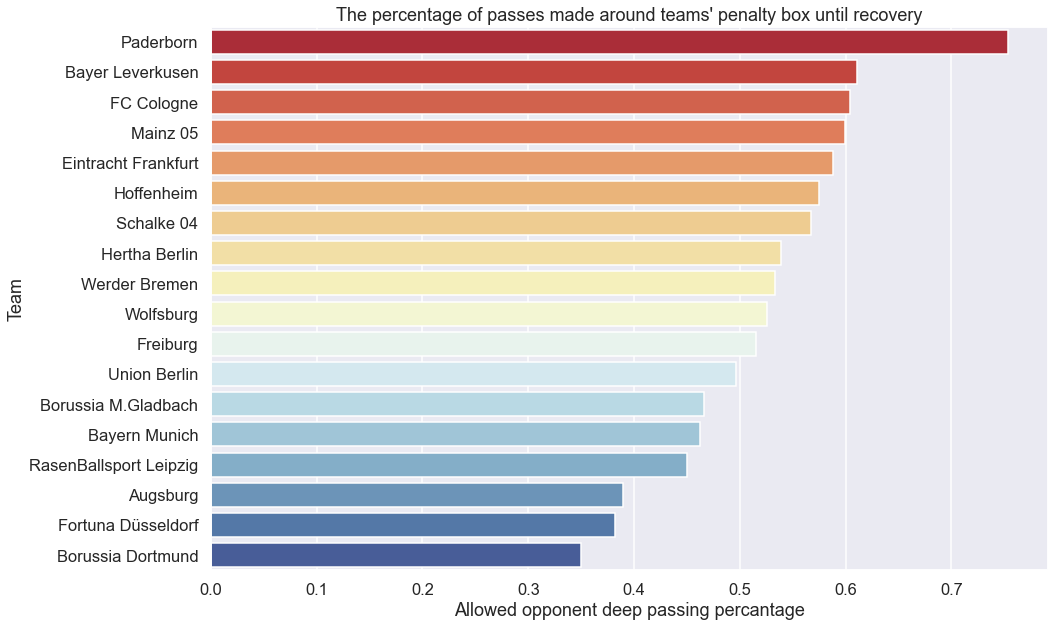

In [17]:
#Plot a bar graph to show the percantage of how many of the passes allowed 
#before recovery were inside a team's penalty box

ax = plt.subplots(figsize=(15, 10))
sns.barplot("press_eff", "team", data=bundesliga_press, palette="RdYlBu")
plt.xlabel("Allowed opponent deep passing percantage")
plt.ylabel("Team")
plt.title("The percentage of passes made around teams' penalty box until recovery")

Text(0.5, 1.0, "The percentage of passes made inside opponents' penalty box until loss")

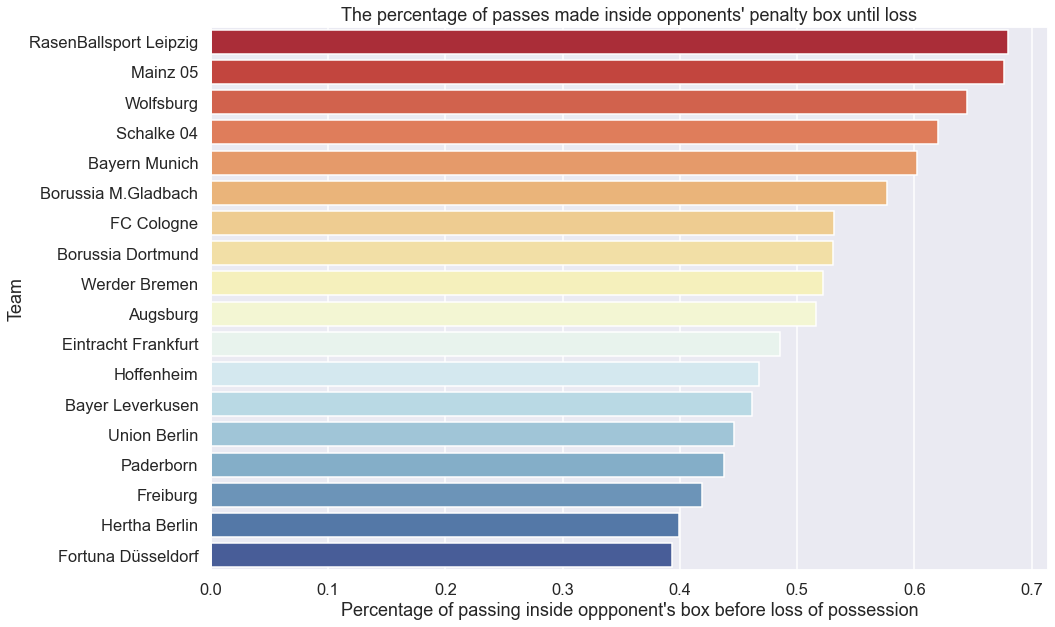

In [18]:
#Plot a bar graph to show the percantage of how many passes teams allowed 
#inside their penalty box before recovering the ball 

ax = plt.subplots(figsize=(15, 10))
sns.barplot("peneteration", "team", data=bundesliga_penet, palette="RdYlBu")
plt.xlabel("Percentage of passing inside oppponent's box before loss of possession")
plt.ylabel("Team")
plt.title("The percentage of passes made inside opponents' penalty box until loss")

This chart provides insight on how often teams allow their opponents to approach their penalty box by passing. Reading from the bar plot above, around only 35% of the average opponent passing was made inside Borussia Dortmund's penalty box, meaning that Dortmund received the ball back before allowing their opponents -65% of the time on average- before they could pass inside their penalty box. This metric basically shows us how likely teams are to leave passing spaces in dangerous areas.

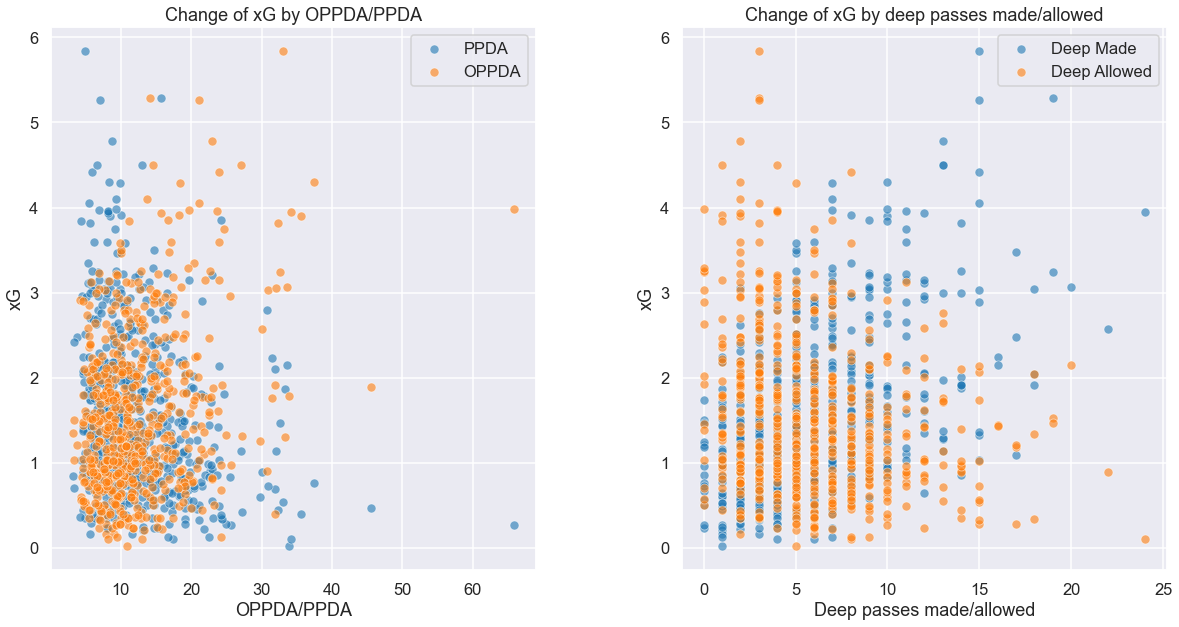

In [19]:
#Create scatter plots side-by-side showing how goal expectation changes
#by metrics ppda_coef, oppda_coef, deep and deep_allowed

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3)
sns.scatterplot(x="ppda_coef", y="xG", data=bundesliga, ax=ax1, alpha=0.6)
sns.scatterplot(x="oppda_coef", y="xG", data=bundesliga, ax=ax1, alpha=0.6)
ax1.set(title = ("Change of xG by OPPDA/PPDA"), xlabel=("OPPDA/PPDA"), ylabel=("xG"))
ax1.legend(["PPDA","OPPDA"])

sns.scatterplot(x="deep", y="xG", data=bundesliga, ax=ax2, alpha=0.6)
sns.scatterplot(x="deep_allowed", y="xG", data=bundesliga, ax=ax2, alpha=0.6)
plt.xlabel("Deep passes made/allowed")
plt.ylabel("xG")
plt.title("Change of xG by deep passes made/allowed")
plt.legend(["Deep Made", "Deep Allowed"])
plt.show()

There doesn't appear to be a pattern between on how teams' xG change depending on PPDA/OPPDA or deep passes made/allowed metrics.

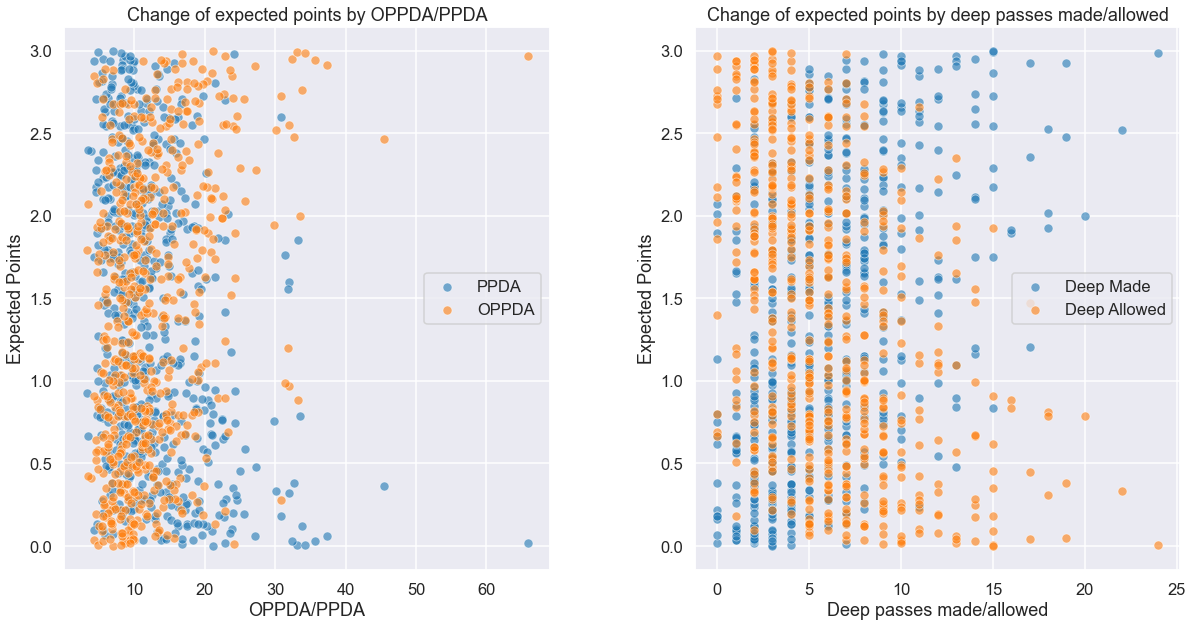

In [20]:
#Create scatter plots side-by-side showing how xpts changes
#by metrics ppda_coef, oppda_coef, deep and deep_allowed

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3)
sns.scatterplot(x="ppda_coef", y="xpts", data=bundesliga, ax=ax1, alpha=0.6)
sns.scatterplot(x="oppda_coef", y="xpts", data=bundesliga, ax=ax1, alpha=0.6)
ax1.set(title = ("Change of expected points by OPPDA/PPDA"), xlabel=("OPPDA/PPDA"), ylabel=("Expected Points"))
ax1.legend(["PPDA","OPPDA"])

sns.scatterplot(x="deep", y="xpts", data=bundesliga, ax=ax2, alpha=0.6)
sns.scatterplot(x="deep_allowed", y="xpts", data=bundesliga, ax=ax2, alpha=0.6)
plt.xlabel("Deep passes made/allowed")
plt.ylabel("Expected Points")
plt.title("Change of expected points by deep passes made/allowed")
plt.legend(["Deep Made", "Deep Allowed"])
plt.show()

And that trend of no relation seems to follow for expected points aswell. Therefore it would be safe to say that deep passing or PPDA/OPPDA metrics have no direct effect on the results teams have received.

In [21]:
#Filter the Bundesliga dataset to get rows that only contain data for RB Leipzig
leipzig = bundesliga[bundesliga["team"] == "RasenBallsport Leipzig"]
leipzig.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,press_eff,peneteration
3536,Bundesliga,2019,a,3.93387,0.782907,3.933870,0.782907,12,2,4,0,2.8868,w,2019-08-18 17:00:00,1,0,0,3,3.150963,8.227273,181,22,15.769231,410,26,RasenBallsport Leipzig,-0.06613,0.782907,-0.1132,0.243094,0.760976
3537,Bundesliga,2019,h,1.77604,0.935237,1.776040,0.935237,2,4,2,1,2.0720,w,2019-08-25 14:30:00,1,0,0,3,0.840803,13.863636,305,22,9.296296,251,27,RasenBallsport Leipzig,-0.22396,-0.064763,-0.9280,0.288525,0.215139
3538,Bundesliga,2019,a,3.13131,1.458600,3.131310,1.458600,7,4,3,1,2.4716,w,2019-08-30 19:30:00,1,0,0,3,1.672710,8.166667,294,36,8.285714,290,35,RasenBallsport Leipzig,0.13131,0.458600,-0.5284,0.489796,0.844828
3539,Bundesliga,2019,h,1.65427,1.670400,0.896496,1.670400,7,10,1,1,1.3633,d,2019-09-14 16:30:00,0,1,0,1,-0.773904,17.178571,481,28,9.142857,192,21,RasenBallsport Leipzig,0.65427,0.670400,0.3633,0.582121,0.765625
3540,Bundesliga,2019,a,1.72557,0.583174,1.725570,0.583174,8,9,3,0,2.2829,w,2019-09-21 16:30:00,1,0,0,3,1.142396,9.785714,274,28,13.952381,293,21,RasenBallsport Leipzig,-1.27443,0.583174,-0.7171,0.919708,0.573379


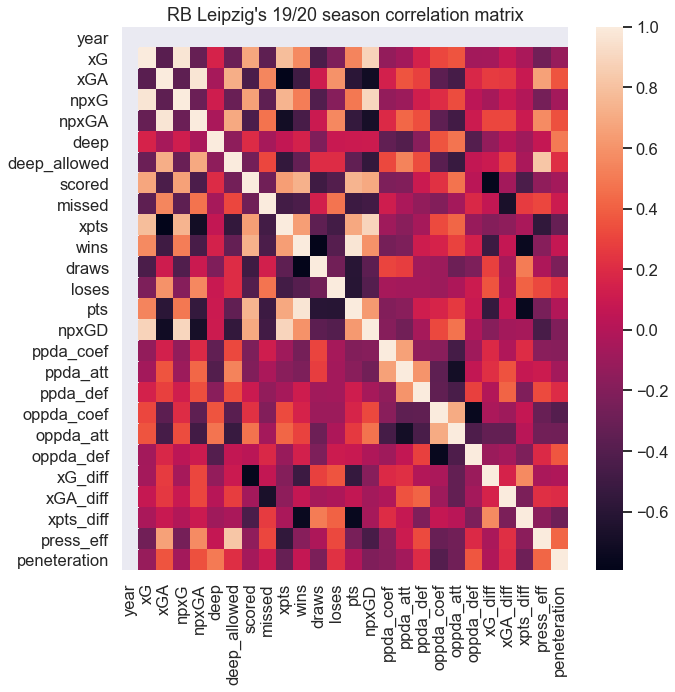

In [22]:
#Create a heatmap to visulize the Pearson correlation coefficient for RB Leipzig metrics
sns.set_context("talk")
ax=plt.subplots(figsize=(10,10))
sns.heatmap(leipzig.corr())
plt.title("RB Leipzig's 19/20 season correlation matrix")
plt.savefig("leipzig_matrix")

# Correlation between RB Leipzig data features 
The correlation matrix is a very intuitive visualization method to discover *linear* relationships between features. Although it must be noted that a low Pearson coefficient doesn't necessarily indicate that the features in question are not correlated at all, this value only informs us of whether if the selected features are *linearly* correlated. Therefore, a very strong polynomial correlation (such as a parabola) between two variables will still return a low Pearson coefficient.

In [23]:
#Create variables by filtering which venue the game was played at
leipzig_home = leipzig[leipzig["h_a"] == "h"]
leipzig_away = leipzig[leipzig["h_a"] == "a"]

In [24]:
#Calculate the average goal expectations by venue 
print(leipzig_home.xG.mean(), leipzig_away.xG.mean())

1.9151372352941172 2.5628958823529415


In [25]:
#See how many games RB Leipzig won, lost or drew
leipzig["result"].value_counts()

w    18
d    12
l     4
Name: result, dtype: int64

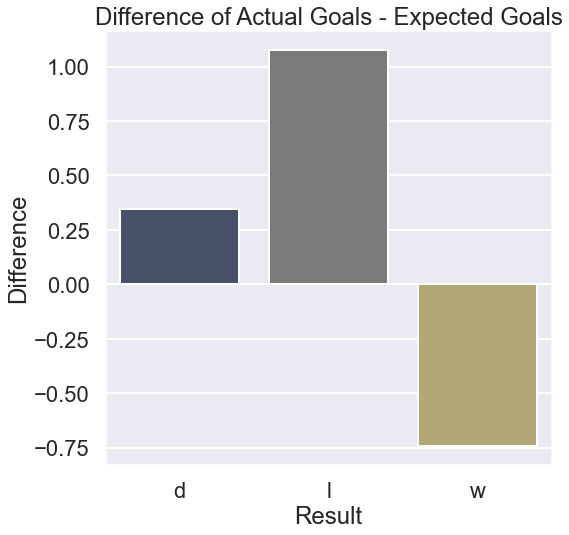

In [26]:
#Create a bar plot showing the difference between how much difference
#there was between goals that were actually scored and should've been
#scored in average by each result

leipzig_r_xg = leipzig.groupby("result").xG_diff.mean().head()
leipzig_r_xg = leipzig_r_xg.reset_index()

sns.set_style("darkgrid")
sns.set_context("poster")
ax = plt.subplots(figsize=(8, 8))
sns.barplot("result", "xG_diff", data=leipzig_r_xg, palette="cividis")
plt.title("Difference of Actual Goals - Expected Goals")
plt.ylabel("Difference")
plt.xlabel("Result")
plt.show()

# Goals scored - goal expectation difference per result category
Here's another plot that I find enjoyable to look at. Each bar stands for a result (win/draw/lose) and the y-axis represents the mean difference between the actual count of goals scored and the goal expectation metric. Or to mathematically notate:

(The average of actual goal counts for each result category) - (The average of xG for each result category)

According to the above graph, Leipzig have exceeded expectations in terms of goal scoring for the games they won, which means that they scored fewer goals than they were supposed to. And interestingly enough, Leipzig apparently have overperformed in the games they couldn't win and scored more goals than they were expected to. This might indicate that Leipzig won the games they bagged 3 points by dominating their opponents, whereas for the ones they couldn't win the team were outperformed on the pitch and couldn't get many scoring opportunities, yet somehow managed to make the ball cross the goal line.

In [27]:
plt.clf()

<Figure size 432x288 with 0 Axes>

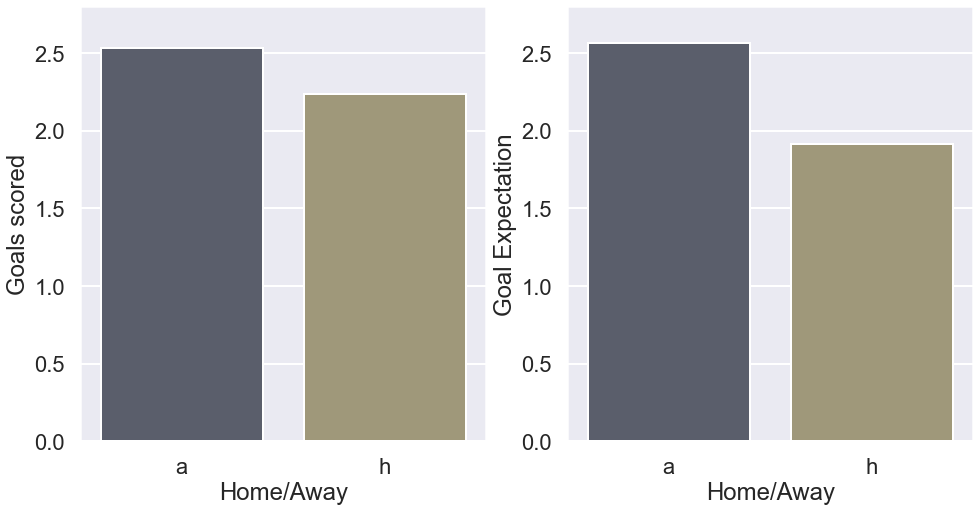

In [28]:
#Plot two bar graphs side-by-side, one showing how the average amounts of goals
#scored per game and the other xG per game depending on the venue played

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.set_context("poster")

sns.barplot("h_a", "scored", data=leipzig, ax=ax1, ci=False, palette = "cividis")
ax1.set(xlabel=("Home/Away"), ylabel=("Goals scored"), ylim=[0, 2.8])

sns.barplot("h_a", "xG", data=leipzig, ax=ax2 , ci=False, palette = "cividis")
plt.ylim([0, 2.8])
plt.xlabel("Home/Away")
plt.ylabel("Goal Expectation")
plt.show()

# Comparison of goals scored and xG by venue played (home/away)
The plots above allow us to compare the average counts of goals scored and expected per game by whether the game was played at Red Bull Arena or not. 

It appears that Leipzig have performed better at away games in terms of scoring goals and there's just a slight difference between the actual and expected amount of goals for away games. 

For home games however, the difference between actual goals and xG seem to differ roughly by 0.5 goals in average. Basically, Leipzig have (again, roughly) scored a goal more than they should have for each two game played at home. This might've been caused by a variety of factors, such as fan support or opponents shifting to a more reactive style of play since it's an away game. Therefore it could lead to incorrect assumptions if we were to draw conclusions from these graphs alone.

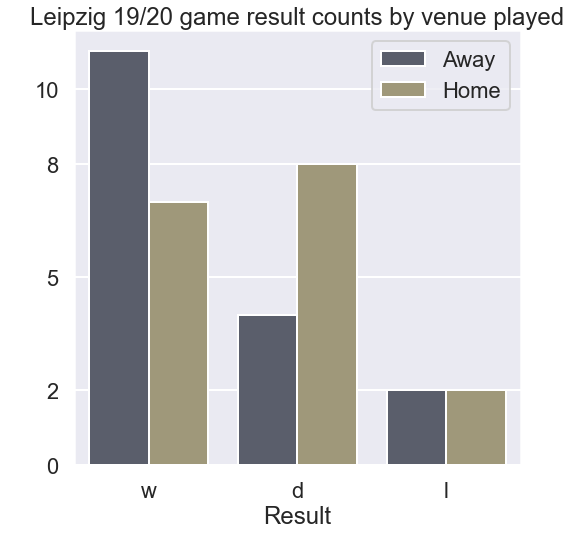

h_a  result
a    w         11
     d          4
     l          2
h    d          8
     w          7
     l          2
Name: result, dtype: int64


In [29]:
#Create a count plot that visualizes the amounts of wins, draws and losses
#depending on the venue played

results_h_a = leipzig.groupby("h_a").result.value_counts()
ax = plt.subplots(figsize = (8, 8))

sns.countplot("result",data=leipzig,hue="h_a", palette = "cividis")
plt.yticks([0, 2, 5, 8, 10])
plt.title("Leipzig 19/20 game result counts by venue played")
plt.xlabel("Result")
plt.ylabel(" ")
plt.legend(["Away", "Home"])
plt.show()
print(leipzig.groupby("h_a").result.value_counts())

# Result counts by venue the game was played
Just like the bar plots under the above cells which depicted that Leipzig had scored more goals away, the team appears to have also won almost 50% more games away compared to home matches. The significance of their away performance manifests itself further considered that Leipzig has more draws at home than wins. 

It wouldn't be correct to draw any conclusions without further analysis although, on whether if they just overperformed at away games or their home record's an outcome of underperformance. These statements might sound like they are essentially addressing the same thing at first, however it could be seen that is not the case after going over them once more carefully.

# What does it take to win the title?

We looked into RB Leipzig's performance data, and we saw that RB Leipzig should've been second place if Borussia Dortmund didn't overperform in terms of point collected throughout the season, which'd put them right under the reigning champions, Bayern München.

Let's compare Leipzig and Bayern to see what differences their seasons had in terms of numbers and try to make sense of it.

In [30]:
#Select rows with only Bayern and Leipzig as teams
leipzig_bayern = bundesliga[(bundesliga["team"] == "Bayern Munich") | (bundesliga["team"] == "RasenBallsport Leipzig")]
leipzig_bayern.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,press_eff,peneteration
3060,Bundesliga,2019,h,2.47707,1.18459,1.71929,1.184590,17,2,2,2,2.3576,d,2019-08-16 19:30:00,0,1,0,1,0.534700,10.500000,168,16,16.217391,373,23,Bayern Munich,0.47707,-0.81541,1.3576,0.190476,1.048257
3061,Bundesliga,2019,a,1.59729,1.08016,0.83951,1.080160,9,6,3,0,1.8269,w,2019-08-24 17:30:00,1,0,0,3,-0.240650,9.684211,184,19,18.280000,457,25,Bayern Munich,-1.40271,1.08016,-1.1731,0.619565,0.492341
3062,Bundesliga,2019,h,3.34597,0.72047,3.34597,0.720470,8,2,6,1,2.8148,w,2019-08-31 14:30:00,1,0,0,3,2.625500,5.354839,166,31,20.350000,407,20,Bayern Munich,-2.65403,-0.27953,-0.1852,0.373494,0.393120
3063,Bundesliga,2019,a,1.67040,1.65427,1.67040,0.896496,10,7,1,1,1.3717,d,2019-09-14 16:30:00,0,1,0,1,0.773904,9.142857,192,21,17.178571,481,28,Bayern Munich,0.67040,0.65427,0.3717,0.765625,0.582121
3064,Bundesliga,2019,h,2.92351,1.03267,2.16573,1.032670,12,7,4,0,2.5456,w,2019-09-21 13:30:00,1,0,0,3,1.133060,7.920000,198,25,14.500000,319,22,Bayern Munich,-1.07649,1.03267,-0.4544,0.883838,0.827586


Text(0, 0.5, ' ')

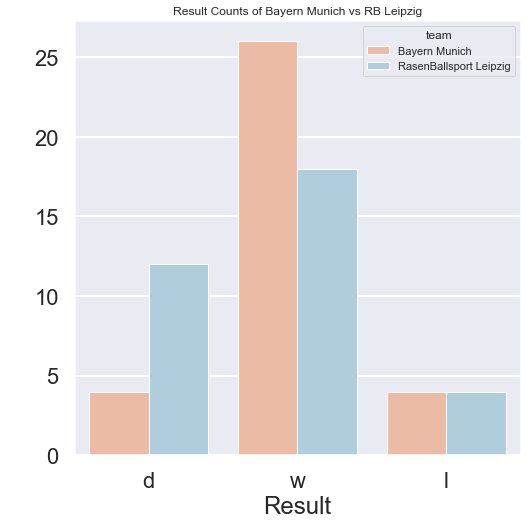

In [31]:
#Compare the results of Bayern and Leipzig
ax = plt.subplots(figsize = (8, 8))
sns.set_context("notebook")
sns.countplot("result", hue="team", data=leipzig_bayern, palette="RdBu")
plt.title("Result Counts of Bayern Munich vs RB Leipzig")
plt.xlabel("Result")
plt.ylabel(" ")

team
Bayern Munich             11.970588
RasenBallsport Leipzig     8.911765
Name: deep, dtype: float64
team
Bayern Munich             21.020124
RasenBallsport Leipzig    14.923454
Name: oppda_coef, dtype: float64


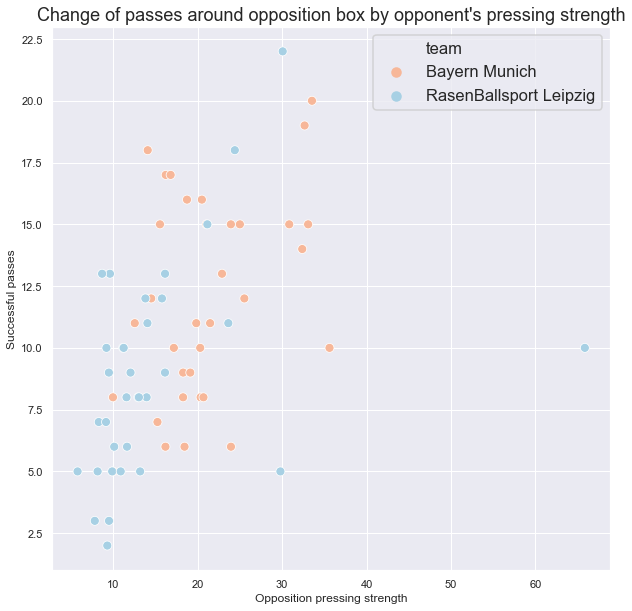

In [32]:
#Create a scatter plot visualizing how each team performed regarding deep passes
#under different levels of pressure received 

ax = plt.subplots(figsize = (10, 10))
sns.set_context("talk")
sns.scatterplot("oppda_coef", "deep", hue="team", data=leipzig_bayern, palette="RdBu")
plt.title("Change of passes around opposition box by opponent's pressing strength")
plt.ylabel("Successful passes")
plt.xlabel("Opposition pressing strength")
print(leipzig_bayern.groupby("team").deep.mean())
print(leipzig_bayern.groupby("team").oppda_coef.mean())

What this graph and the mean values of oppda_coef and deep metrics tell us is that Leipzig received more pressure (50% tougher) from their opponents, or simply wasn't good enough at passing the ball around under pressure as much as Bayern. 

This might be an indicator of that RB Leipzig, compared to Bayern München, had more troubles peneterating through defenses that sit back and focus on leaving no empty spaces.

(0.0, 0.85)

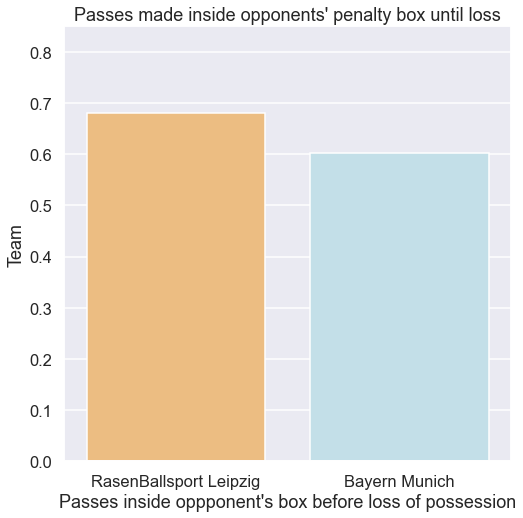

In [33]:
#Plot a bar graph showing how many passes were made in average before losing the ball 
#inside the opposition box

ax = plt.subplots(figsize=(8, 8))
sns.barplot("team", bundesliga_penet["peneteration"], data=bundesliga_penet[(bundesliga_penet["team"] == "RasenBallsport Leipzig") | 
                                                       (bundesliga_penet["team"] == "Bayern Munich")], palette="RdYlBu")
plt.xlabel("Passes inside oppponent's box before loss of possession")
plt.ylabel("Team")
plt.title("Passes made inside opponents' penalty box until loss")
plt.ylim([0, 0.85])

In average, roughly for each 0.7 pass made inside the opponent's box, Leipzig had their ball intercepted while that number is closer to 0.6 for Bayern. Therefore it could be said that Leipzig were more potent when it came to working the ball inside the box.

team
Bayern Munich             3.500000
RasenBallsport Leipzig    4.617647
Name: deep_allowed, dtype: float64
team
Bayern Munich              8.064508
RasenBallsport Leipzig    10.691325
Name: ppda_coef, dtype: float64


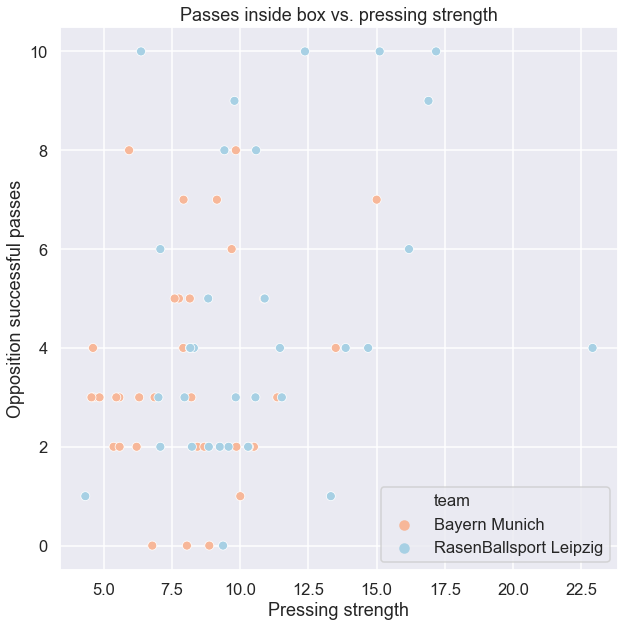

In [34]:
#Create a scatter plot that visualizes how many passes teams allowed inside
#their own box before recovering the ball

ax = plt.subplots(figsize = (10, 10))
sns.set_context("talk")
sns.scatterplot("ppda_coef", "deep_allowed", hue="team", data=leipzig_bayern, palette="RdBu")
plt.title("Passes inside box vs. pressing strength")
plt.ylabel("Opposition successful passes")
plt.xlabel("Pressing strength")
print(leipzig_bayern.groupby("team").deep_allowed.mean())
print(leipzig_bayern.groupby("team").ppda_coef.mean())

Leipzig seem to have allowed their opponents pass inside their box 30% more in average compared to Bayern, and again, they let their opponents pass 25% more than Bayern did before intercepting the ball.

(0.0, 0.65)

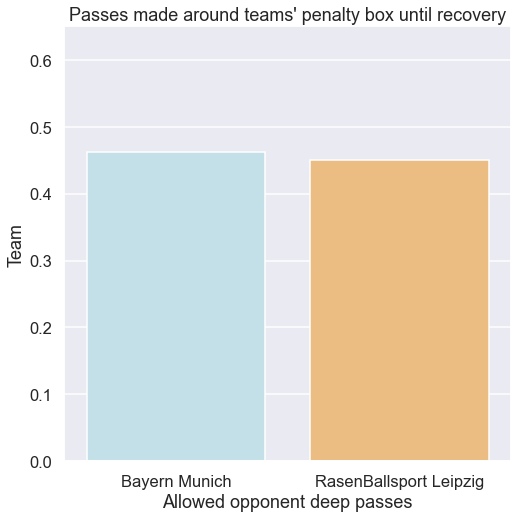

In [35]:
#Plot a bar graph showing how many of the passes were made inside
#Bayern and Leipzig's box before recovery

ax = plt.subplots(figsize=(8, 8))
sns.barplot("team", "press_eff", data=bundesliga_press[(bundesliga_press["team"] == "RasenBallsport Leipzig") | 
                                                       (bundesliga_press["team"] == "Bayern Munich")], palette="RdYlBu_r")
plt.xlabel("Allowed opponent deep passes")
plt.ylabel("Team")
plt.title("Passes made around teams' penalty box until recovery")

plt.ylim([0, 0.65])

This graph shows us that the two teams have shown similar behavior when it came to allowing their opponents pass inside their box. An average of each 0.45 of opposition passes were intercepted around the teams' penalty box. In other words, Bayern and Leipzig have recovered the ball for every 0.45 pass made inside their box.

Basically, both of these teams allowed their opponents to pass inside their box less than they could pass inside their opponents' box in average.